<a href="https://colab.research.google.com/github/BoomerPython/Week_5/blob/main/DSA_BoomerPython_Week5_LogitModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import packages for analysis and modeling
import pandas as pd  # data frame operations
import numpy as np  # arrays and math functions

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt  # 2D plotting
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING

# Obtain and Scrub the Data

In [3]:
# OBTAIN

sales = pd.read_csv('https://raw.githubusercontent.com/BoomerPython/Week_5/main/SustainableSalesProducts.csv')
sales.head()

,Country,OrderMethod,RetailerType,ProductLine,ProductType,Product,Year,Quarter,SustainableClaim,SustainableMarketing,Revenue,Quantity,GrossMargin
0,United States,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Deluxe Cook Set,2012,Q1 2012,1,0,59628.66,489,0.347548
1,United States,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Double Flame,2012,Q1 2012,0,1,35950.32,252,0.474274
2,United States,Fax,Outdoors Shop,Camping Equipment,Tents,Star Dome,2012,Q1 2012,1,0,89940.48,147,0.352772
3,United States,Fax,Outdoors Shop,Camping Equipment,Tents,Star Gazer 2,2012,Q1 2012,1,0,165883.41,303,0.282938
4,United States,Fax,Outdoors Shop,Camping Equipment,Sleeping Bags,Hibernator Lite,2012,Q1 2012,1,0,119822.20,1415,0.291450


In [5]:
# SCRUB - just look at one country's data

df = sales[sales.Country == "Japan"]
df.head()

,Country,OrderMethod,RetailerType,ProductLine,ProductType,Product,Year,Quarter,SustainableClaim,SustainableMarketing,Revenue,Quantity,GrossMargin
2146,Japan,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Water Bag,2012,Q1 2012,0,1,28009.45,7091,0.465823
2147,Japan,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Utensils,2012,Q1 2012,0,1,17954.11,957,0.466974
2148,Japan,Fax,Outdoors Shop,Camping Equipment,Lanterns,Firefly Extreme,2012,Q1 2012,1,1,7504.70,151,0.434205
2149,Japan,Fax,Outdoors Shop,Camping Equipment,Lanterns,EverGlow Single,2012,Q1 2012,0,1,15638.70,462,0.467061
2150,Japan,Fax,Outdoors Shop,Mountaineering Equipment,Rope,Husky Rope 50,2012,Q1 2012,1,0,19401.60,129,0.329056


In [6]:
# SCRUB - Prepare Data for Modeling

# Establish your features - or independent variables
x = df[['Revenue','Quantity']]

# Establish your response variable - target
y = df['SustainableClaim']

# There are many ways to split data - this is one
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)  # 


# Exploratory Data Analysis

This section is left for the student to consider - what graphics should you build?

# Modeling

In [7]:
# MODEL

# Building logistic model
model = LogisticRegression()

# Using training data to train the model
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Looking at Model Performance

Accuracy =  0.6349502487562189


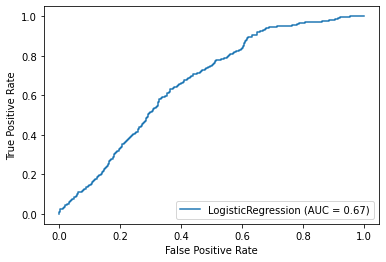

In [8]:
# MODEL - Two ways to look at model performance

# Score method - Compare test vs actual
score = model.score(x_test, y_test)
print('Accuracy = ',score)

# Receiver Operating Charactersitc (ROC) curve
plot_roc_curve(model, x_test, y_test)
plt.show()

In [10]:
#MODEL - Additional metrics
predictions = model.predict(x_test)

# Setting up to print the results
test_prob = model.predict_proba(x_test)[:, 1]
test_pred = model.predict(x_test)

print('Log loss          = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC               = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy  = {:.5f}'.format(accuracy_score(y_test, predictions)))
print('Precision = {:.5f}'.format(precision_score(y_test, predictions)))
print('Recall    = {:.5f}'.format(recall_score(y_test, predictions)))
print('F1 score  = {:.5f}'.format(f1_score(y_test, predictions)))

print('\nClassification Report')
print(classification_report(y_test, predictions))

Log loss = 0.67520
AUC      = 0.66638
Average Precision = 0.61437

Using 0.5 as threshold:
Accuracy  = 0.63495
Precision = 0.58678
Recall    = 0.89084
F1 score  = 0.70752

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.38      0.51       811
           1       0.59      0.89      0.71       797

    accuracy                           0.63      1608
   macro avg       0.68      0.64      0.61      1608
weighted avg       0.68      0.63      0.61      1608



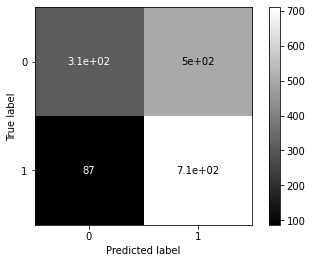

Accuracy = 0.6349502487562189


In [12]:
# MODEL - Confusion matrix
cm = metrics.confusion_matrix(y_test, predictions)

plot_confusion_matrix(model, x_test, y_test, cmap='gray')
plt.show()

print('Accuracy =', score)
